# Redshift Data of DESIJ1709+3154

Author: Anowar Shajib, S M Rafee Adnan

## Load data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
from astropy.io import fits
from astropy.wcs import WCS

In [2]:
data, header = fits.getdata("DESIJ1709+3154_F140W_drz_sci.fits", header=True)

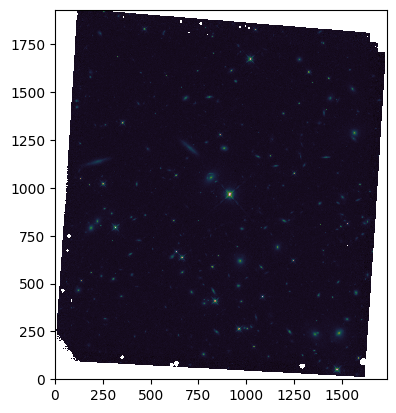

In [3]:
plt.imshow(np.log10(data), origin="lower", cmap="cubehelix", interpolation="nearest")

In [2]:
FILENAME = "photo_z_DESIJ1709+3154.csv"  # need to be changed for each cluster file
data_legacy = pd.read_csv(FILENAME, delimiter=",")
data_legacy.head()

,_r,id,RAJ2000,DEJ2000,release,brickid,objid,type,pstar,gmmcomp,zphot,e_zphot,fclean,fqual
0,0.008081,8000506465000435,257.431131,31.896583,8000,506465,435,PSF,0.518,P6,0.726,0.140,1,0
1,0.006260,8000506465000581,257.430482,31.898672,8000,506465,581,REX,0.003,R4,0.565,0.066,1,1
2,0.005520,8000506465000582,257.430084,31.899663,8000,506465,582,PSF,0.052,P1,0.711,0.230,1,1
3,0.007326,8000506465000585,257.427837,31.898797,8000,506465,585,PSF,0.000,P3,1.216,0.237,1,1
4,0.007309,8000506465000592,257.439808,31.899628,8000,506465,592,PSF,0.795,P4,1.835,1.898,1,0


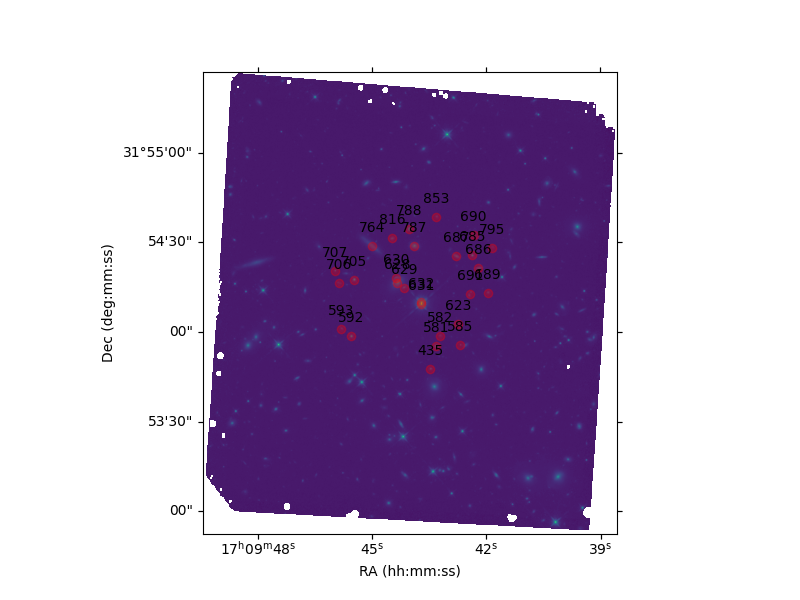

In [6]:
%matplotlib widget
wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    data_legacy["RAJ2000"], data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.3
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy["objid"][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(
        f"{obj_id}", (x, y), textcoords="offset points", xytext=(0, 10), ha="center"
    )

# Add labels
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

plt.show()

In [9]:
# In degrees
center_x, center_y = 257.4333333, 31.9044444  # RA 17:09:44 DEC 31:54:16
radii = 20  # in arcsec
radii_deg = radii / 3600

x_upper, y_upper = center_x + radii_deg, center_y + radii_deg
x_lower, y_lower = center_x - radii_deg, center_y - radii_deg

x_limit_upper, y_limit_upper = wcs.all_world2pix(x_upper, y_upper, 0)
x_limit_lower, y_limit_lower = wcs.all_world2pix(x_lower, y_lower, 0)

print(x_limit_upper, x_limit_lower)

655.0979311645395 1079.5633366173665


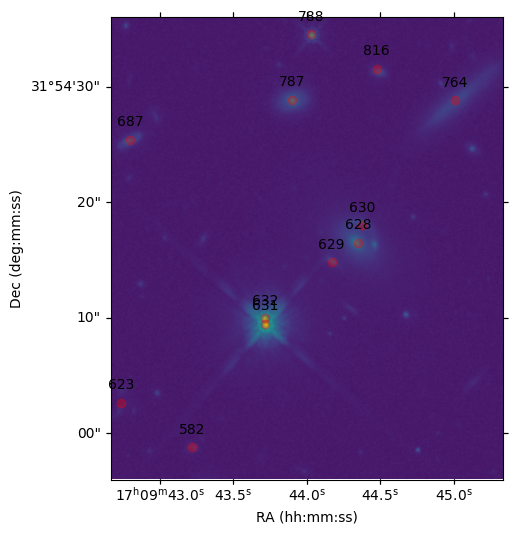

In [10]:
%matplotlib inline

wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    data_legacy["RAJ2000"], data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.3
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy["objid"][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(
        f"{obj_id}", (x, y), textcoords="offset points", xytext=(0, 10), ha="center"
    )

# Add labels
ax.set_xlim(x_limit_lower, x_limit_upper)
ax.set_ylim(y_limit_lower, y_limit_upper)
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

In [3]:
data_legacy.sort_values(by="objid")

# central deflector
central_deflector_id = 628
object_ids = [central_deflector_id,
              629, 630, 787, 764]  

columns_to_drop = [
    "id",
    "RAJ2000",
    "DEJ2000",
    "release",
    "brickid",
]  # List of column names to drop
data_legacy_dropped = data_legacy.drop(columns=columns_to_drop)

selected_data_legacy = data_legacy_dropped[
    data_legacy_dropped["objid"].isin(object_ids)
]
selected_data_legacy.set_index("objid", inplace=True)

print(selected_data_legacy)

             _r  type  pstar gmmcomp  zphot  e_zphot  fclean  fqual
objid                                                              
628    0.001241  COMP  0.022      C0  0.720    0.083       0      0
629    0.000680   REX  0.001      R7  0.950    0.246       0      0
630    0.001445   DEV  0.020      D6  0.609    0.106       0      0
764    0.005049   EXP  0.103      E4  0.103    0.041       1      1
787    0.003592   REX  0.002      R4  0.561    0.067       1      1


## Save the Redshift data to the YAML file

In [4]:
# Existing YAML file with other parameters
existing_yaml_file = "DESIJ1709+3154_point_estimates.yml"

# Variables to include in the YAML file
z_phot = selected_data_legacy.loc[central_deflector_id,'zphot']
e_zphot = selected_data_legacy.loc[central_deflector_id,'e_zphot']

environment_variables = {
    "z_phot": [z_phot, e_zphot]
}

# make all the numpy variales to float
environment_variables = {
    key: [float(item) for item in value] if isinstance(value, list) else float(value)
    for key, value in environment_variables.items()
}

# Load existing YAML content if the file exists
existing_content = {}
try:
    with open(existing_yaml_file, "r") as file:
        existing_content = yaml.safe_load(file)
except FileNotFoundError:
    pass

# Update the existing content with new variables
existing_content.update(environment_variables)

# Write the updated content back to the YAML file
with open(existing_yaml_file, "w") as file:
    yaml.dump(existing_content, file, default_flow_style=False)